# Aproximación de enlace fuerte

Siempre pretendemos resolver

$$ \hat{H} | \psi \rangle = E | \psi \rangle $$

La función de onda la escribimos como una combinación de orbitales atómicos para el carbono, $s_p^3$, $s$. $p_x$, $p_y$, $p_z$.

$$ \psi = \sum_{i=1}^{n} c_i \phi (\vec{r} - R_i) $$

donde n es el número de átomos que tengo,

$$ \sum_{i}^{n} c_i \hat{H} \phi ( \vec{r} - \vec{R}_i) = E \sum_{i=1}^{n} c_i \phi_i (\vec{r} - \vec{R}_i) $$

Multiplicamos a izquierda por $\phi^{*} (\vec{r} - \vec{R}_j)$ e integramos en todo el espacio:

$$ \sum_{i=1}^{n} c_i \int \phi^{*}_j(\vec{r}-\vec{R}_j)  \hat{H} \phi(\vec{r}-\vec{R}_i) d\vec{r} = E \sum_{i=1}^{n} c_i \int \phi^{*} (\vec{r}-\vec{R}_j) \phi(\vec{r}-\vec{R}_i) d\vec{r}$$

Los orbitales atómicos son ortonormales entre sí

$$ \int \phi^{*} (\vec{r} - \vec{R}_j) \phi((\vec{r} - \vec{R}_j) d\vec{r} = \delta_{ij}$$

$$ \sum_{i=1} c_i \int \phi^{*} (\vec{r} - \vec{R}_j) \hat{H} \phi(\vec{r} - \vec{R}_i) d\vec{r} = E c_j $$

Aoproximación:

1 a primeros vecinos:

$$ C_1 t + C_5 t = E C_0 $$
$$ C_0 t + C_2 t = E C_1 $$
$$ C_1 t + C_3 t = E C_2 $$
$$ C_2 t + C_4 t = E C_3 $$
$$ C_3 t + C_5 t = E C_4 $$
$$ C_0 t + C_4 t = E C_5 $$

$$ \left( \begin{matrix}
0 && t && 0 && 0 && 0 && t \\
t && 0 && t && 0 && 0 && 0 \\
0 && t && 0 && t && 0 && 0 \\
0 && 0 && t && 0 && t && 0 \\
0 && 0 && 0 && t && 0 && t \\
t && 0 && 0 && 0 && t && 0 \\
\end{matrix}  \right) \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) = E \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) $$


Los valores de t, los podemos determinar desde experimentos desde otros cálculos. Dado el valor de t determinar E.

t = -2.7

In [1]:
# Importando paquetes
import pandas as pd
import numpy as np

# Funcion que lee un archivo y genera un vector de atomos
# y coordenadas.
def readfile(archivo):
    file = open(archivo, "r")
    lines = file.readlines()
    atom=[]
    coords=[]
    for line in lines[2:]:
        A, x, y, z = line.split()
        coords.append([x,y])
        if A == 'C': A = 1
        else: A = 0
        atom.append(A)
    coords = np.array(coords, dtype=float)
    file.close()
    return atom,coords

# Funcion que genera una matriz de distancias entre los Carbonos.
def getMatrizDistancias(atom,coords):
    C = pd.DataFrame(coords, columns=['x', 'y'], index=atom)
    Cs = C[C.index==1] 
    X1, X2 = np.meshgrid(Cs.x,Cs.x)
    Y1, Y2 = np.meshgrid(Cs.y,Cs.y)
    #Z1, Z2 = np.meshgrid(Cs.z,Cs.z)
    D = np.sqrt((X2-X1)**2+(Y2-Y1)**2)#+(Z2-Z1)**2)
    return D

def getT(t, atom, coords):
    D = getMatrizDistancias(atom, coords)
    np.fill_diagonal(D, 1000)
    D = pd.DataFrame(D) 
    Dmin = np.min(D)
    D[abs(D-1.44)>0.5]=0.
    D[D>0.]=t
    return np.array(D)

atom, coords = readfile('benzene.xyz')
t = -2.8
T = getT(t, atom, coords)
E, eigvec = np.linalg.eigh(T)
np.sort(E)

array([-5.4, -2.7, -2.7,  2.7,  2.7,  5.4])

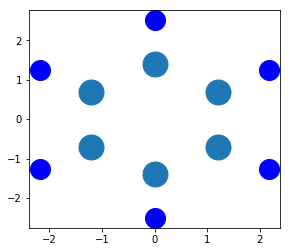

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
a, coor = readfile('benzene.xyz')
C = pd.DataFrame(coor, columns=['x', 'y'], index=a)
Cs = C[C.index==1] 
Hs = C[C.index==0] 
plt.figure(figsize=(4.5,4))
plt.plot(Cs.x, Cs.y, 'o', ms=25)
plt.plot(Hs.x, Hs.y, 'o', c='blue', ms=20)

# Clase Benzeno

In [3]:
import numpy as np
from math import sqrt
    
class nodo:
    def __init__(self,n,x=0,y=0):
        self.x = x
        self.y = y
        self.n = n
        self.acc = 1.44
        self.coords=[]
        
    def derecha(self, x, y):
        self.x = self.acc + x
        self.y = y
        return nodo(self.n, self.x, self.y)
    
    def arriba(self, x, y):
        self.x = 3/2*self.acc + x
        self.y = sqrt(3)/2*self.acc + y
        return nodo(self.n, self.x, self.y)
    
    def abajo(self, x, y):
        self.x = 3/2*self.acc + x
        self.y = -sqrt(3)/2*self.acc + y
        return nodo(self.n, self.x, self.y)
    
    def agrega(self, x, y, i=0, coords=[]):
        if i<=self.n:
            i += 1 
            U = self.arriba(x,y)
            R = self.derecha(x,y)
            coords.append((R.x, R.y))
            coords.append((U.x, U.y))
            U.agrega(U.x, U.y, i=i, coords=coords)
            D = self.abajo(x,y)
            return D.agrega(D.x, D.y, i=i, coords=coords)        
        return coords
    
    def agrega_ilera(self, x, y, j=0, coords=[]):
        if j<self.n-1:
            j+=1
            D = self.abajo(self.x,self.y)
            coords.append((D.x, D.y))
            return D.agrega_ilera(D.x, D.y,j=j, coords=coords)
        D = self.abajo(0,0)
        coords.append((D.x, D.y))
        return coords
    
    def triangular(self, x,y):
        coords = self.agrega(x, y)
        coords += self.agrega_ilera(x,y)
        coords = np.transpose(list(set(coords)))
        x = list(coords[0])
        y = list(coords[1])
        i = y.index(max(y))
        x.pop(i)
        y.pop(i)
        self.x = np.array(x)
        self.y = np.array(y)
        self.coords = np.array([x,y])
        return self


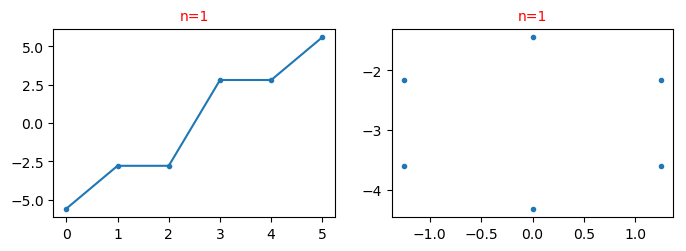

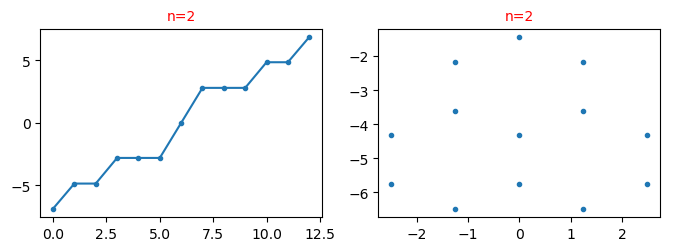

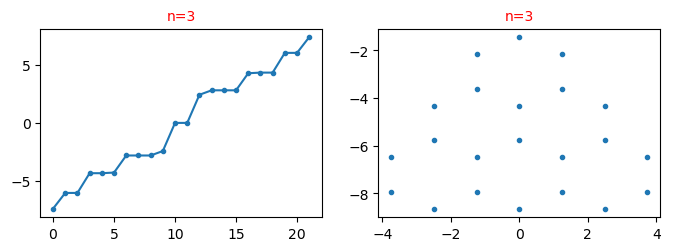

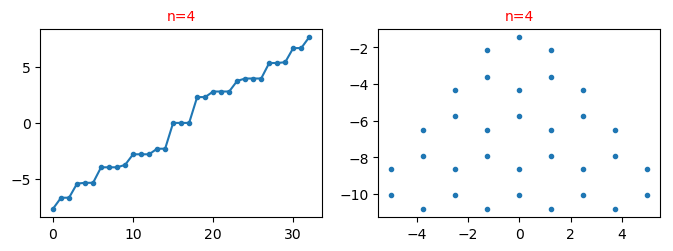

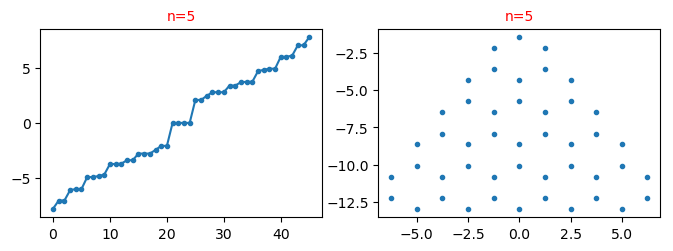

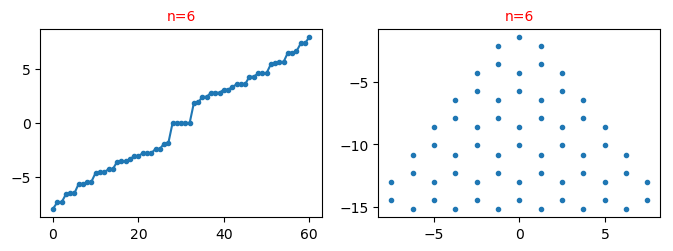

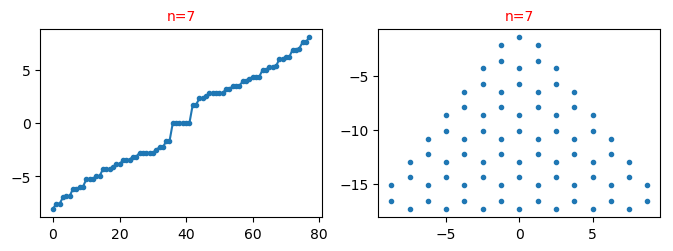

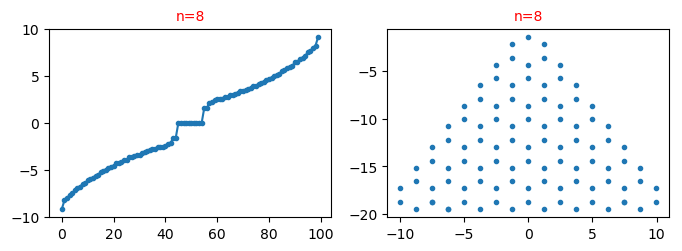

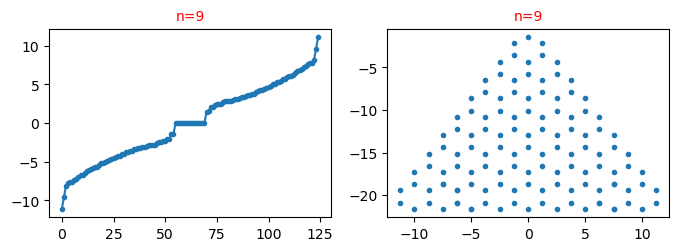

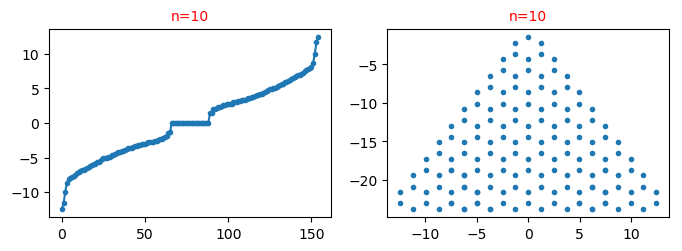

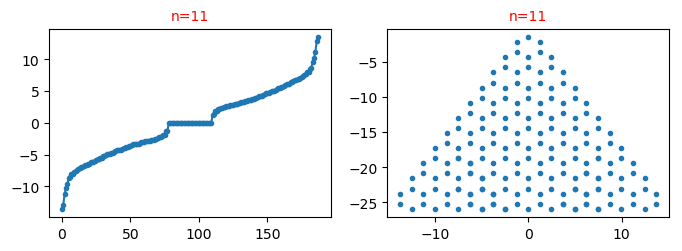

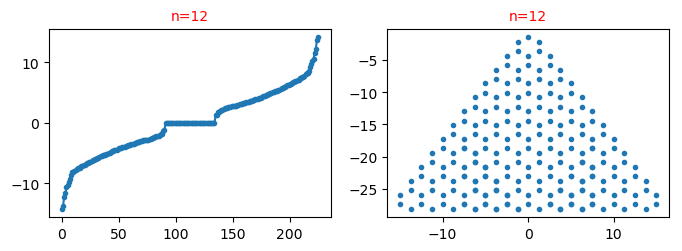

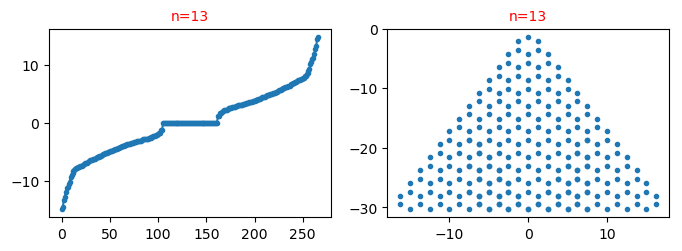

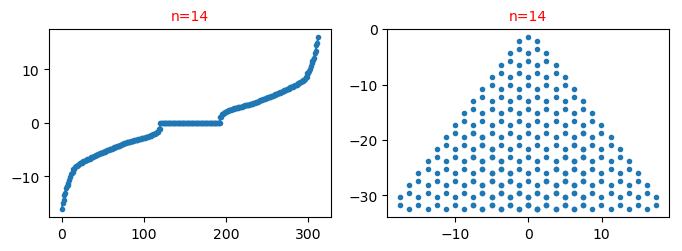

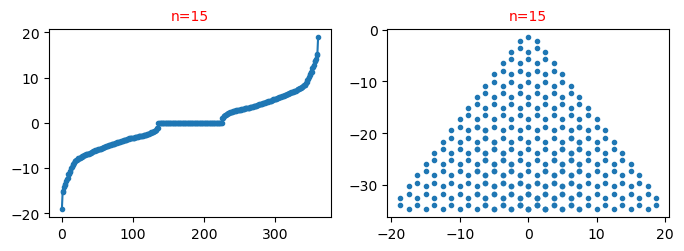

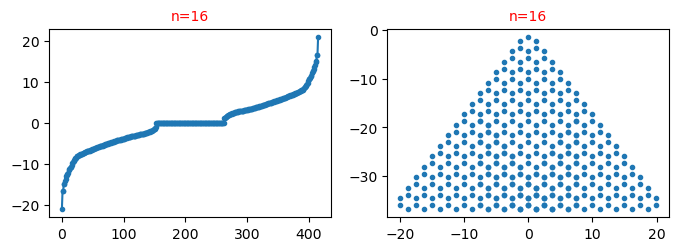

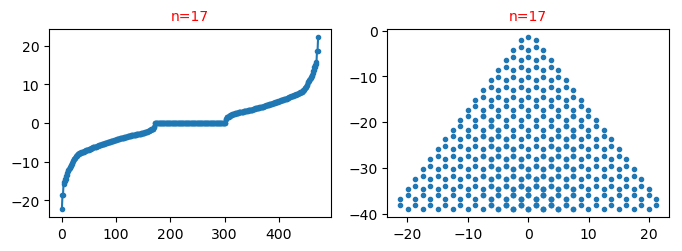

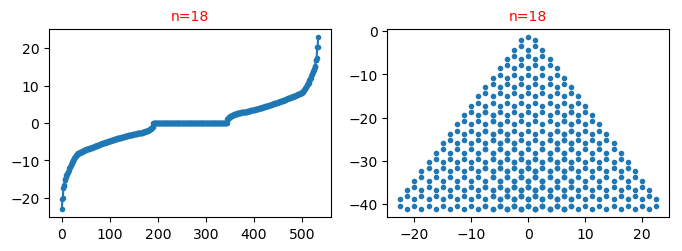

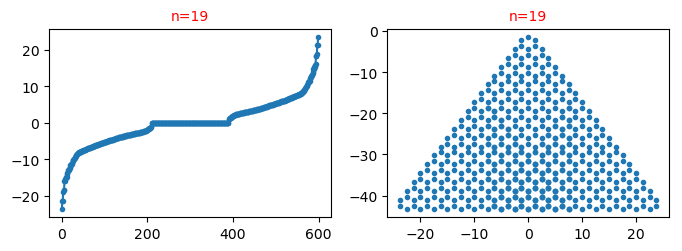

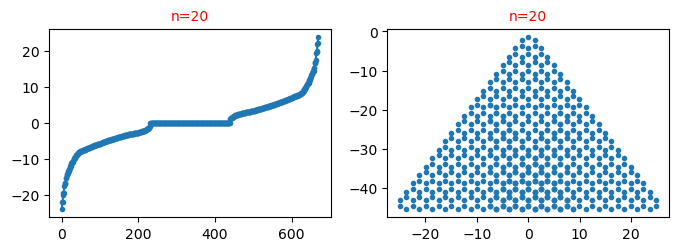

In [4]:
import matplotlib.pyplot as plt

for i in range(1,21):
    BENZENO = nodo(i).triangular(0,0)
    x = BENZENO.x
    y = BENZENO.y
    coords = BENZENO.coords.T
    
    t = -2.8
    coords = BENZENO.coords
    atom = np.ones(len(coords[0]))
    T = getT(t, atom, coords.T)
    E, eigvec = np.linalg.eigh(T)
    E= np.sort(E)
    
    fig,(ax1,ax2) = plt.subplots(figsize=(8,2.5), dpi=100, ncols=2)
    ax1.set_title("n="+str(i), fontsize=10, color='r')
    ax2.set_title("n="+str(i), fontsize=10, color='r')
    ax1.plot(E, '.-')
    ax2.plot(y,-x, '.')
    plt.show()

# Pybinding

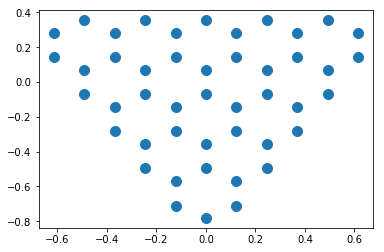

In [5]:
import numpy as np

import pybinding as pb
from pybinding.repository import graphene

def asymmetric_strain(c):
    @pb.site_position_modifier
    def displacement(x, y, z):
        ux = -c/2 * x**2 + c/3 * x + 0.1
        uy = -c*2 * x**2 + c/4 * x
        return x + ux, y + uy, z
    return displacement

model = pb.Model(
    graphene.bilayer(),
    pb.regular_polygon(num_sides=3, radius=1.1),
    asymmetric_strain(c=0.42)
)

from math import pi
model = pb.Model(
graphene.monolayer(),
pb.regular_polygon(num_sides=3, radius=1, angle=pi),
)

plt.plot(model.system.x, model.system.y, 'o', ms=10)